In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer , MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

### 讀取存檔數據

In [2]:
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [3]:
train_features.head(10)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Intensity (All Water Sources) (gal/ft²),...,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,13276,5849784,90300.0,1950,1,100,126.0,5.2,1.2,99.41,...,0,0,0,0,0,0,0,0,0,0
1,7377,4398442,52000.0,1926,1,100,95.4,4.7,0.9,NaN,...,0,0,0,0,0,0,0,0,0,0
2,9479,4665374,104700.0,1954,1,100,40.4,3.8,0.3,NaN,...,0,0,0,0,0,0,0,0,0,0
3,14774,3393340,129333.0,1992,1,100,157.1,16.9,1.1,NaN,...,0,0,0,1,0,0,0,0,0,0
4,3286,2704325,109896.0,1927,1,100,62.3,3.5,0.0,28.65,...,0,0,0,0,0,0,0,0,0,0
5,1060,2430725,182655.0,1929,1,90,52.9,9.7,0.2,4.80,...,0,0,0,0,0,0,0,0,0,0
6,10846,5737475,65400.0,1942,1,100,66.8,3.0,0.6,67.14,...,0,0,0,0,0,0,0,0,0,0
7,4280,2670505,113150.0,1938,1,100,78.4,5.7,NaN,30.73,...,0,0,0,0,0,0,0,0,0,0
8,12974,2964670,137700.0,1959,1,100,63.0,3.4,0.5,41.96,...,0,0,0,0,0,0,0,0,0,0
9,13244,4414693,63693.0,1941,1,100,97.8,4.3,0.8,86.88,...,0,0,0,0,0,0,0,0,0,0


### 缺失值填充

在sklearn中，可以使用Scikit-learn的Imputer來進行缺失值填充<br>
對於測試集中使用訓練集中的結果來進行填充，目的在於防止[data leakage](https://www.kaggle.com/dansbecker/data-leakage)<br>
在做機器學習的題目時，應避免測試集的資訊出現再訓練集中

In [4]:
imputer = Imputer(strategy = 'median') # 以中位數來填充缺失值
imputer.fit(train_features)

X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

C:\Users\peng\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
print('Missing values in training features : {}'.format(np.sum(np.isnan(X))))
print('Missing values in testing features : {}'.format(np.sum(np.isnan(X_test))))
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

Missing values in training features : 0
Missing values in testing features : 0
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


對缺失值填充有各種各樣的方法 [this article](https://www.tandfonline.com/doi/full/10.1080/1743727X.2014.979146)

### 特徵標準化與歸一化

In [6]:
# 將數值型數據減掉最小值，在除上最大值與最小值的差
scaler = MinMaxScaler(feature_range = [0 , 1])
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [7]:
y = np.array(train_labels).reshape([-1 , ])
y_test = np.array(test_labels).reshape([-1 , ])

### 選擇的機器學習算法（回歸問題）

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

只選擇其默認的參數，這裡先不進行調參工作，後續再來調參

In [8]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    y_pred = model.predict(X_test)
    
    model_mae = np.mean(abs(y_test - y_pred))
    
    return model_mae

In [9]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)
print('Linear Regression Performance on the test set : {:.2f}'.format(lr_mae))

Linear Regression Performance on the test set : 13.47


In [10]:
svm = SVR(C = 1000 , gamma = 0.1)
svm_mae = fit_and_evaluate(svm)
print('Support Vector Machine Regression Performance on the test set : {:.2f}'.format(svm_mae))

Support Vector Machine Regression Performance on the test set : 10.93


In [11]:
random_forest = RandomForestRegressor(random_state = 60)
random_forest_mae = fit_and_evaluate(random_forest)
print('Random Forest Regression Performance on the test set : {:.2f}'.format(random_forest_mae))

C:\Users\peng\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set : 10.01


In [12]:
gradient_boosted = GradientBoostingRegressor(random_state = 60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)
print('Gradient Boosted Regression Performance on the test set : {:.2f}'.format(gradient_boosted_mae))

Gradient Boosted Regression Performance on the test set : 10.01


In [13]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn_mae = fit_and_evaluate(knn)
print('K-Nearest Neighbors Regression Performance on the test set : {:.2f}'.format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set : 13.01


In [14]:
model_comparison = pd.DataFrame({'model': ['Linear Regression' ,  'Support Vector Machine' , 'Random Forest', 'Gradient Boosted' , 'K-Nearest Neighbors'],
                                 'mae': [lr_mae , svm_mae , random_forest_mae , gradient_boosted_mae , knn_mae]})
 
model_comparison.sort_values('mae' , ascending = False , inplace = True)

Text(0, 0.5, 'Mean Absolute')

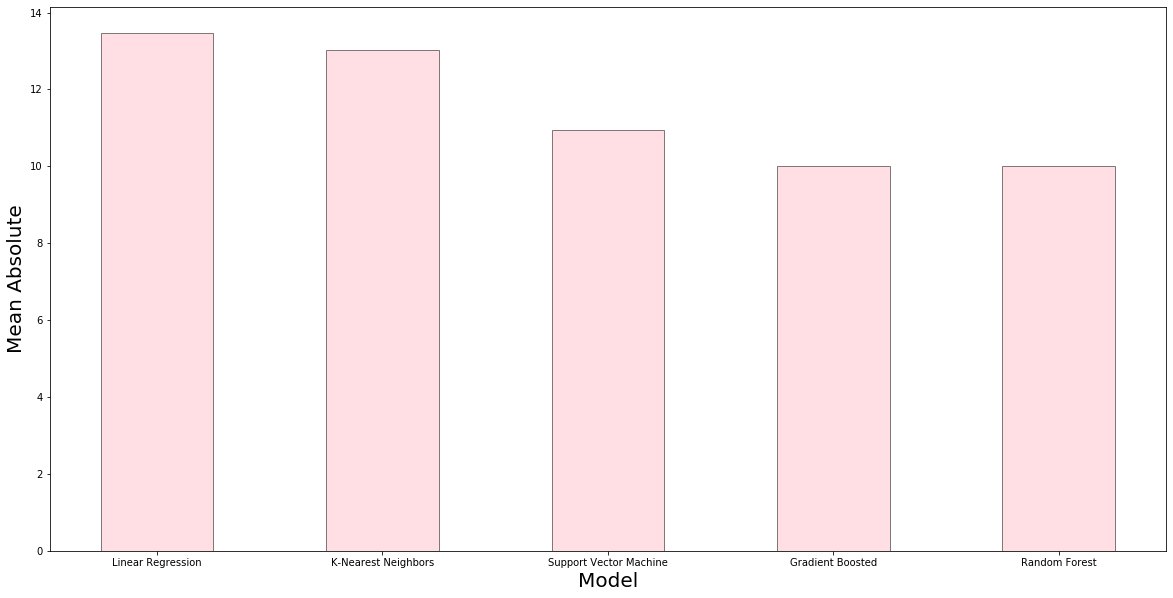

In [15]:
fig, ax = plt.subplots(1 , 1 , figsize = (20 , 10))
ax.bar(model_comparison['model'] , model_comparison['mae'] , alpha = 0.5 , width = 0.5 , facecolor = 'pink' , edgecolor = 'black')
ax.set_xlabel('Model' , fontsize = 20)
ax.set_ylabel('Mean Absolute' , fontsize = 20)

看起來集成算法更占優勢一些，但不太公平，因為參數都只用了默認<br>
而對於SVM來說參數可能影響會更大一些

### 調參

In [16]:
# Loss function to be optimized
loss = ['ls' , 'lad' , 'huber']

# Number of trees used in the boosting process
n_estimators = [100 , 500 , 900 , 1100 , 1500]

# Maximum depth of each tree
max_depth = [2 , 3 , 5 , 10 , 15]

# Minimum number of samples per leaf
min_samples_leaf = [1 , 2 , 4 , 6 , 8]

# Minimum number of samples to split a node
min_samples_split = [2 , 4 , 6 , 10]

# Maximum number of features to consider for making splits
max_features = ['auto' , 'sqrt' , 'log2' , None]

# Define the grid of hyperparameters to search
parameter_grid = {'loss' : loss,
                  'n_estimators' : n_estimators,
                  'max_depth' : max_depth,
                  'min_samples_leaf' : min_samples_leaf,
                  'min_samples_split' : min_samples_split,
                  'max_features' : max_features}

在gradient boosting算法中，先選擇6組可調參數，目的就是找到最好的組合
* `estimator`: the model
* `param_distributions`: the distribution of parameters we defined
* `cv` the number of folds to use for k-fold cross validation
* `n_iter`: the number of different combinations to try
* `scoring`: which metric to use when evaluating candidates
* `n_jobs`: number of cores to run in parallel (-1 will use all available)
* `verbose`: how much information to display (1 displays a limited amount) 
* `return_train_score`: return the training score for each cross-validation fold
* `random_state`: fixes the random number generator used so we get the same results every run

In [17]:
model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator = model ,
                               param_distributions = parameter_grid ,
                               cv = 4,  # 4-fold cross validation
                               n_iter = 25 , 
                               scoring = 'neg_mean_absolute_error' , # negative mean absolute error 目的是為了得到最大的，所以最好的損失就是0了
                               n_jobs = -1 ,
                               verbose = 1 , 
                               return_train_score = True ,
                               random_state = 42)

random_cv.fit(X , y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 20.0min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [18]:
# 按照'mean_test_score'由大排到小，也就是按照測試集的mean absolute error由小排到大
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score' , ascending = False) 
random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
12,23.310052,0.431295,0.033907,0.005088,500,6,6,None,5,lad,...,-9.037796,-9.015748,0.201330,1,-6.934705,-6.837958,-6.869084,-6.840749,-6.870624,0.038950
3,26.915129,0.411415,0.032973,0.001573,500,6,8,None,5,huber,...,-9.072910,-9.042099,0.176375,2,-4.384343,-4.326121,-4.823009,-4.229809,-4.440820,0.227453
9,19.358361,1.414148,0.040732,0.013962,500,4,2,auto,3,huber,...,-9.152405,-9.173823,0.158075,3,-6.955777,-7.088986,-6.913108,-6.940327,-6.974550,0.067813
0,4.217284,0.017467,0.007481,0.004376,100,2,6,auto,5,ls,...,-9.200983,-9.196537,0.162634,4,-7.302003,-7.312645,-7.173397,-7.386171,-7.293554,0.076569
7,14.109305,0.660292,0.027486,0.005247,500,4,6,auto,3,ls,...,-9.357600,-9.351077,0.215256,5,-7.089709,-7.103749,-7.021418,-7.080088,-7.073741,0.031358
19,34.555437,0.431122,0.046167,0.006604,1100,6,2,auto,3,lad,...,-9.291345,-9.374996,0.066470,6,-8.513004,-8.658903,-7.820534,-8.017995,-8.252609,0.344461
10,178.994200,3.304282,0.160683,0.018170,1100,10,6,None,10,huber,...,-9.474469,-9.381402,0.123712,7,-0.409811,-0.459465,-0.393491,-0.370483,-0.408312,0.032671
2,88.217342,3.851349,0.081160,0.003691,500,4,2,auto,10,huber,...,-9.429670,-9.427967,0.101162,8,-0.205702,-0.193613,-0.164415,-0.141062,-0.176198,0.025235
16,40.993514,0.592383,0.057319,0.003763,1500,4,6,None,3,ls,...,-9.425997,-9.447482,0.212944,9,-4.821677,-4.876202,-4.776650,-4.729506,-4.801009,0.054284
21,8.795547,0.298914,0.037876,0.001515,500,6,4,log2,5,huber,...,-9.408147,-9.452592,0.177036,10,-5.733003,-5.742441,-5.571781,-5.666476,-5.678425,0.068177


In [19]:
random_cv.best_estimator_.get_params() # 取得random search找出最好的參數

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

random search可以幫找大概找到合理的參數位置，但是可能沒那麽精確<br>
grid search可以更清晰的看到隨著參數的變化，對模型產生的影響，這裡先用grid search找到最優化`n_estimators`

In [20]:
# 用grid search找出最佳的'n_estimators'
trees_grid = {'n_estimators' : [100 , 150 , 200 , 250 , 300 , 350 , 400 , 450 , 500 , 550 , 600 , 650 , 700 , 750 , 800]}

model = GradientBoostingRegressor(**random_cv.best_estimator_.get_params())

grid_search = GridSearchCV(estimator = model ,
                           param_grid = trees_grid ,
                           cv = 4 , 
                           scoring = 'neg_mean_absolute_error' ,
                           verbose = 1 , 
                           n_jobs = -1 ,
                           return_train_score = True)

grid_search.fit(X , y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.7min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500,
                                                 n_iter_no_change=None,
               

In [21]:
grid_search.best_estimator_.get_params() # 取得grid search找出最好的參數

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 750,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [22]:
# 按照'mean_test_score'由大排到小，也就是按照測試集的mean absolute error由小排到大
grid_results = pd.DataFrame(grid_search.cv_results_).sort_values('param_n_estimators' , ascending = False)
grid_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,42.189870,0.717455,0.040683,0.007995,800,{'n_estimators': 800},-8.904004,-8.758770,-9.296693,-9.047793,-9.001764,0.198557,2,-6.689643,-6.648109,-6.486269,-6.530287,-6.588577,0.083101
13,41.857383,0.662489,0.053841,0.007778,750,{'n_estimators': 750},-8.901240,-8.752170,-9.298163,-9.050038,-9.000350,0.201601,1,-6.716494,-6.660453,-6.520818,-6.579989,-6.619438,0.074807
12,39.082610,0.447743,0.046079,0.003236,700,{'n_estimators': 700},-8.904417,-8.756333,-9.313023,-9.054063,-9.006906,0.205679,3,-6.743886,-6.695770,-6.611240,-6.624919,-6.668953,0.053861
11,37.953015,0.942220,0.043748,0.006199,650,{'n_estimators': 650},-8.906355,-8.755871,-9.325223,-9.052523,-9.009939,0.210053,4,-6.778068,-6.721452,-6.708191,-6.666758,-6.718617,0.039814
10,40.759222,1.045501,0.074777,0.024480,600,{'n_estimators': 600},-8.911869,-8.755309,-9.328529,-9.050274,-9.011442,0.210691,6,-6.827791,-6.741860,-6.743018,-6.709999,-6.755667,0.043698
9,35.635822,0.487845,0.039668,0.009946,550,{'n_estimators': 550},-8.918650,-8.757408,-9.325524,-9.043029,-9.011101,0.207834,5,-6.874737,-6.781878,-6.809121,-6.745712,-6.802862,0.047201
8,26.755707,0.190243,0.040891,0.006148,500,{'n_estimators': 500},-8.924769,-8.775548,-9.325077,-9.037796,-9.015748,0.201330,7,-6.934705,-6.837958,-6.869084,-6.840749,-6.870624,0.038950
7,24.492158,0.325853,0.031665,0.003553,450,{'n_estimators': 450},-8.938759,-8.776710,-9.334613,-9.038440,-9.022081,0.203153,9,-7.021458,-6.872750,-6.947796,-6.881490,-6.930874,0.059810
6,27.047922,0.268851,0.027924,0.002907,400,{'n_estimators': 400},-8.937069,-8.771293,-9.344492,-9.029748,-9.020600,0.208632,8,-7.081670,-6.923591,-7.019695,-6.981593,-7.001637,0.057498
5,21.973627,0.162424,0.037430,0.013770,350,{'n_estimators': 350},-8.941492,-8.784130,-9.349689,-9.021706,-9.024205,0.206404,10,-7.159768,-6.998551,-7.047694,-7.042547,-7.062140,0.059513


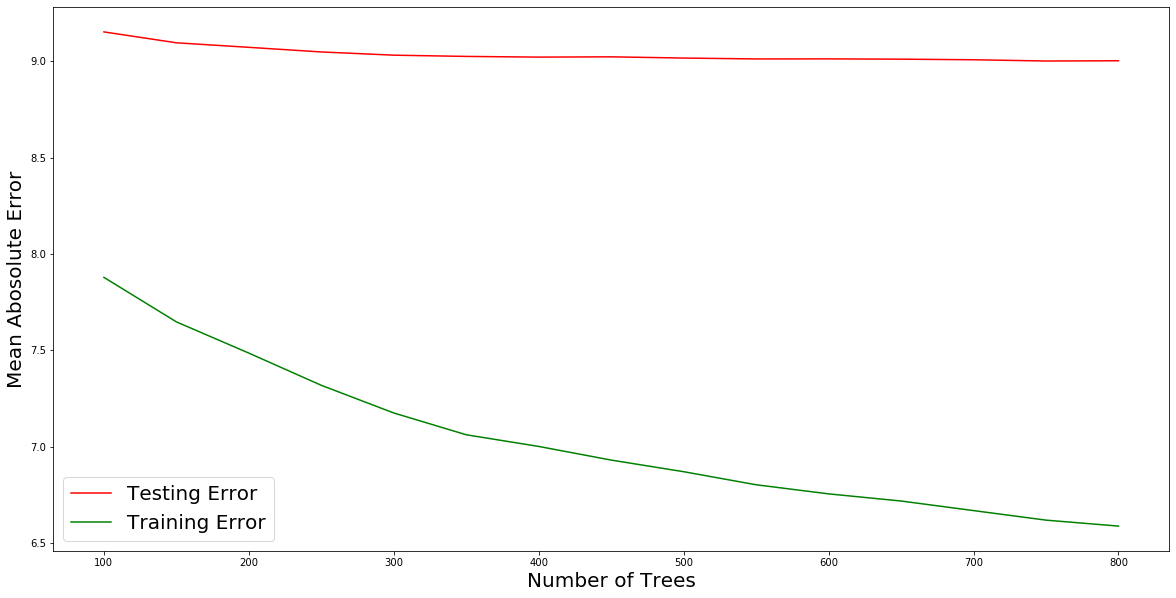

In [23]:
fig, ax = plt.subplots(1 , 1 , figsize = (20 , 10))
ax.plot(grid_results['param_n_estimators'] , -1 * grid_results['mean_test_score'] , color = 'red' , label = 'Testing Error')
plt.plot(grid_results['param_n_estimators'] , -1 * grid_results['mean_train_score'] , color = 'green' , label = 'Training Error')
ax.set_xlabel('Number of Trees' , fontsize = 20)
ax.set_ylabel('Mean Abosolute Error' , fontsize = 20)
ax.legend(fontsize = 20)

從上圖中可以明顯看出模型出現了過擬合現象，隨著樹的個數增多，過擬合現象越來越明顯

### 測試模型

In [24]:
# 預設model
default_model = GradientBoostingRegressor(random_state = 42)
default_model.fit(X , y)

# 利用random search與grid search調參的model
best_model = GradientBoostingRegressor(**grid_search.best_estimator_.get_params())
best_model.fit(X , y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=750,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

比較預設model & random search與grid search調參的model

In [25]:
default_pred = default_model.predict(X_test)
best_pred = best_model.predict(X_test)

print('Default model performance on the test set : {:.3f}'.format(np.mean(abs(y_test - default_pred))))
print('Best model performance on the test set : {:.3f}'.format(np.mean(abs(y_test - best_pred))))

Default model performance on the test set : 10.013
Best model performance on the test set : 9.047


對比試驗結果，訓練時間差異較大但是模型差不多得到了10%的提升<br>
通常來說訓練時間只要可以容忍都是可以的，模型的提升還是很寶貴的

觀察真實值與預測值的分布情況

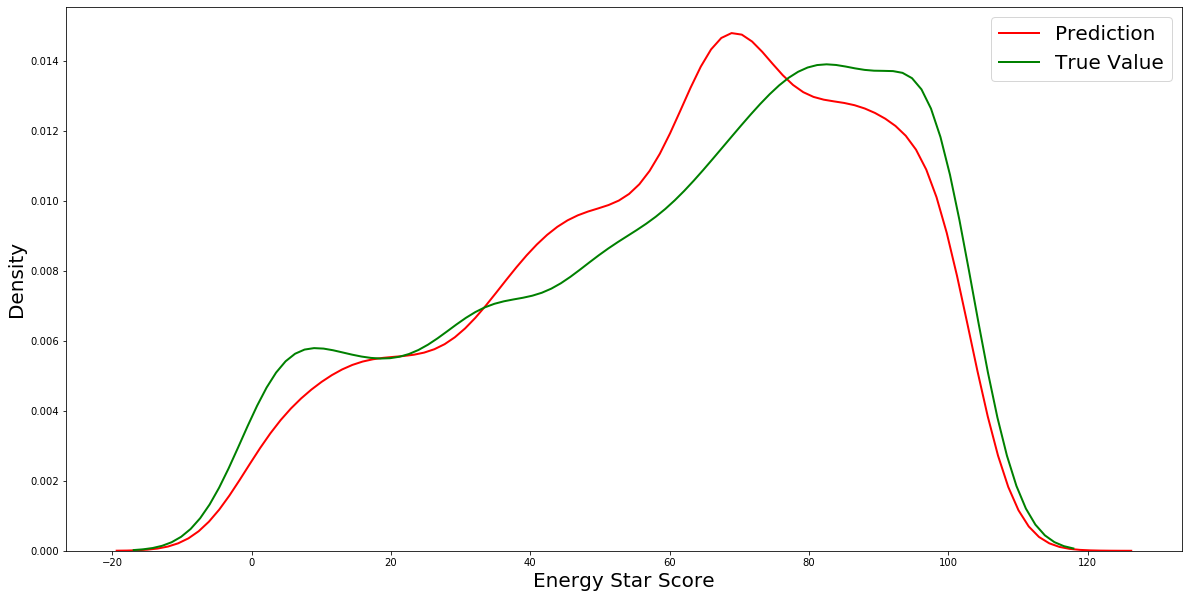

In [26]:
fig, ax = plt.subplots(1 , 1 , figsize = (20 , 10))

sns.kdeplot(best_pred , label = 'Prediction' , color = 'red' , linewidth = 2 , ax = ax)
sns.kdeplot(y_test , label = 'True Value' , color = 'green' , linewidth = 2 , ax = ax)

ax.set_xlabel('Energy Star Score' , fontsize = 20)
ax.set_ylabel('Density' , fontsize = 20)
ax.legend(fontsize = 20)

Text(0, 0.5, 'count')

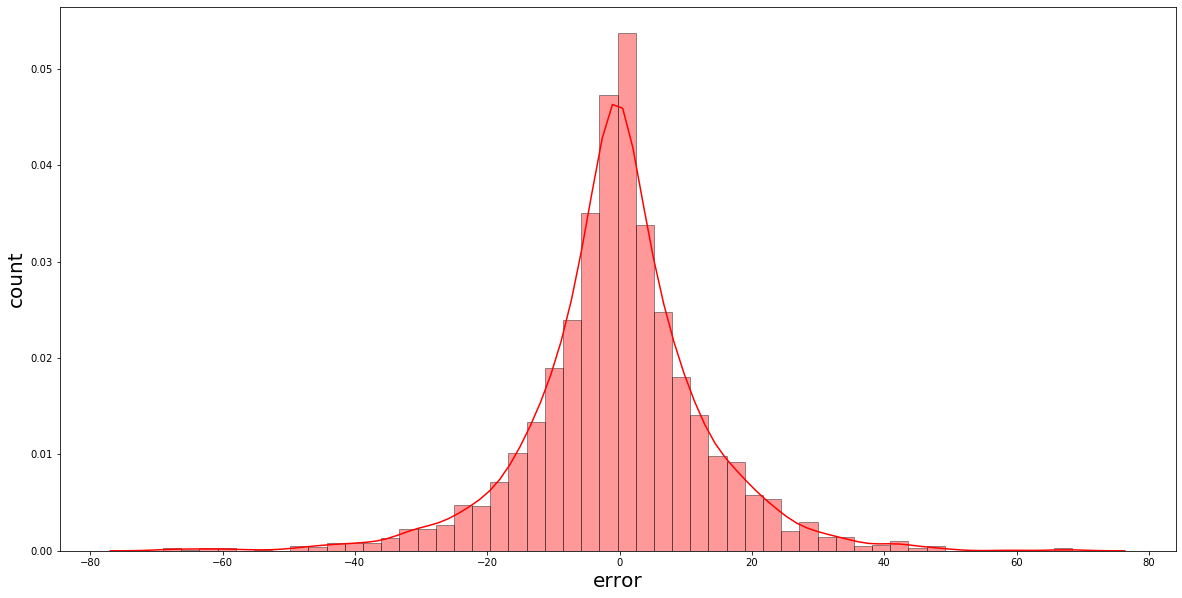

In [27]:
# 計算殘差
residuals = best_pred - y_test

fig , ax = plt.subplots(1 , 1 , figsize = (20 , 10))
sns.distplot(residuals , color = 'red' , bins = 50 ,  ax = ax , hist_kws = {'edgecolor' : 'k'})
ax.set_xlabel('error' , fontsize = 20)  
ax.set_ylabel('count' , fontsize = 20)  

殘差分布情況<br>
可以發現error在0附近是最高的